['x', 'y']
(50000, 3, 32, 32)


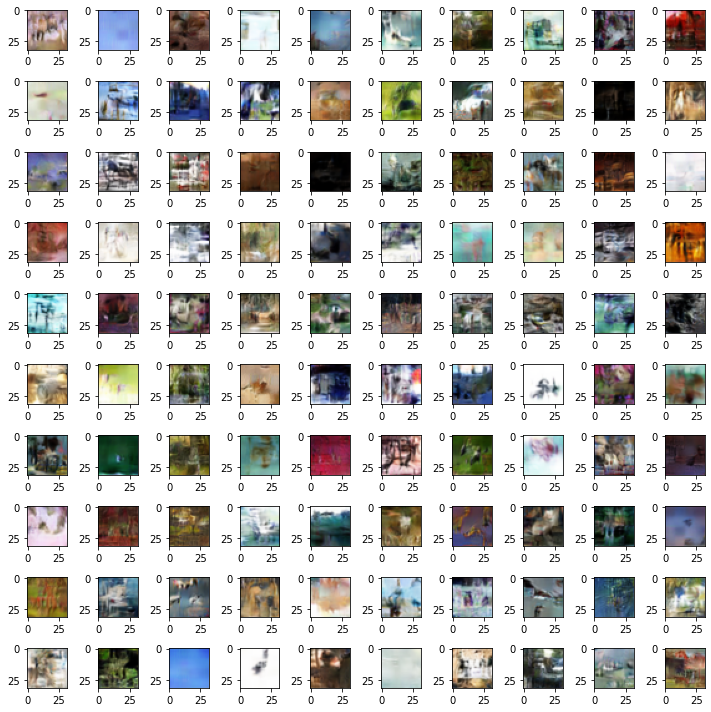

In [1]:
import numpy as np
data = np.load("samples.npz")
import matplotlib.pyplot as plt
print(list(data.keys()))

x = data["x"][:50000]

print(x.shape)

fix, axs = plt.subplots(10,10, figsize=(10,10))

axs = axs.flatten()
for i in range(len(axs)):
    axs[i].imshow(np.moveaxis(x[i], 0, -1))

plt.tight_layout()
plt.show()

import torch 
x = torch.tensor(x)

torch.save(x, "samples.pt")

In [2]:
from pytorch_ood.model import WideResNet
from pytorch_ood.detector import NegativeEnergy, Softmax
from pytorch_ood.utils import OODMetrics
from pytorch_ood.dataset.img import Textures
from torchvision.datasets import CIFAR10 
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import Compose, ToPILImage, Normalize, ToTensor, Resize, ToPILImage
import torch 

mt = Compose([
    Resize([32,32]),
    ToTensor(),
    Normalize(
        std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
        mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
    ])

data_in = CIFAR10(root=".", download=True, transform=mt, train=False)
data_out = Textures(root=".", transform=mt, download=True)


#  TensorDataset(x, torch.ones(x.shape[0]) * -1)

data_loader = DataLoader(data_in+ data_out, batch_size=128)

# create Neural Network
model = WideResNet.from_pretrained("cifar10-pt", num_classes=10).eval().cuda()

model = model.cuda().eval()

# create detector
detector = Softmax(model)

# evaluate
metrics = OODMetrics()

for x, y in data_loader:
    metrics.update(detector(x.cuda()), y)

print(metrics.compute())


/home/kirchhei/anaconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified


/home/kirchhei/anaconda3/envs/pytorch/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/home/kirchhei/anaconda3/envs/pytorch/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


{'AUROC': 0.8851454854011536, 'AUPR-IN': 0.78501296043396, 'AUPR-OUT': 0.9299277067184448, 'ACC95TPR': 0.720716118812561, 'FPR95TPR': 0.40860000252723694}


In [3]:
# from pytorch_ood.model import WideResNet
# from pytorch_ood.detector import NegativeEnergy, Softmax
# from pytorch_ood.utils import OODMetrics
# from pytorch_ood.dataset.img import Textures
# from torchvision.datasets import CIFAR10 
# from torch.utils.data import TensorDataset, DataLoader
# from torchvision.transforms import Compose, ToPILImage, Normalize, ToTensor, Resize, ToPILImage
# import torch 

# from pytorch_ood.loss import OutlierExposureLoss
# from torch.optim import SGD
# from tqdm import tqdm

# mt = Compose([
#     ToPILImage(),
#     Resize([32,32]),
#     ToTensor(),
#     Normalize(
#         std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
#         mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
#     ])

# mt2 = Compose([
#     Resize([32,32]),
#     ToTensor(),
#     Normalize(
#         std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
#         mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
#     ])

# data_in_test = CIFAR10(root=".", download=True, transform=mt2, train=False)
# data_out_test = Textures(root=".", transform=mt2, download=True)
# test_loader = DataLoader(data_in_test + data_out_test, batch_size=512)

# data_in_train = CIFAR10(root=".", download=True, transform=mt2, target_transform=torch.tensor)
# data_out_train = TensorDataset(x,y)
# train_loader = DataLoader(data_in_train + data_out_train, batch_size=256, shuffle=True)
        
# # setup data 
# x = torch.load("samples.pt")[:80000]
# x = torch.stack([mt(t) for t in x])
# y = torch.ones(size=(len(x),)).long() * -1

# # train 

# for alpha in torch.linspace(0.1, 1, 10):
#     print(alpha)
#     # create Neural Network
#     model = WideResNet.from_pretrained("cifar10-pt", num_classes=10).cuda()
#     opti = SGD(model.parameters(), lr=0.001)

#     print(y.shape)
#     print(x.shape)

   

#     criterion = OutlierExposureLoss(alpha=alpha)

#     mav = 0.0
#     mavs = []

#     for i in range(10):
#         bar = tqdm(train_loader)

#         for x, y in bar:
#             opti.zero_grad()
#             y_hat = model(x.cuda())
#             loss = criterion(y_hat, y.cuda())
#             mav = 0.2 * loss.item() + 0.8 * mav
#             mavs.append(mav)

#             loss.backward()
#             opti.step()
#             bar.set_postfix({"loss": mav})

#     # evaluate 
#     with torch.no_grad():

#         model = model.cuda().eval()
#         detector = Softmax(model)
#         metrics = OODMetrics()

#         for x, y in test_loader:
#             metrics.update(detector(x.cuda()), y)

#         print(metrics.compute())
#         print(80*"#")

In [4]:
# import matplotlib.pyplot as plt 
# plt.plot(mavs)

In [6]:
import os 

root = "samples"
# files = [os.path.join(root, x) for x in os.listdir(root)]
files = [os.path.join(root, f"samples-{x}.npz") for x in [0.0, 0.5, 1.0,2.0,5.0,10.0,20.0,30.0,40.0,50.0]]

In [7]:
# Load samples from dataset and train 

In [13]:
from pytorch_ood.model import WideResNet
from pytorch_ood.detector import NegativeEnergy, Softmax
from pytorch_ood.utils import OODMetrics
from pytorch_ood.dataset.img import Textures
from torchvision.datasets import CIFAR10 
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import Compose, ToPILImage, Normalize, ToTensor, Resize, ToPILImage
import torch 
import numpy as np 

from pytorch_ood.loss import OutlierExposureLoss, EnergyRegularizedLoss
from torch.optim import SGD
from tqdm import tqdm
import os 

torch.manual_seed(10)

def run(data_out_train):
    mt = Compose([
        ToPILImage(),
        Resize([32,32]),
        ToTensor(),
        Normalize(
            std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
            mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
        ])

    mt2 = Compose([
        Resize([32,32]),
        ToTensor(),
        Normalize(
            std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
            mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
        ])

    # prepare data 
    data_in_test = CIFAR10(root=".", download=True, transform=mt2, train=False)
    data_out_test = Textures(root=".", transform=mt2, download=True)
    test_loader = DataLoader(data_in_test + data_out_test, batch_size=512, num_workers=20)
    
    data_in_train = CIFAR10(root=".", download=True, transform=mt2, target_transform=torch.tensor)
    train_loader = DataLoader(data_in_train + data_out_train, batch_size=256, shuffle=True, num_workers=20)

    # create Neural Network
    model = WideResNet.from_pretrained("cifar10-pt", num_classes=10).cuda()
    opti = SGD(model.parameters(), lr=0.001)
    
    criterion = OutlierExposureLoss(alpha=0.5)

    mav = 0.0
    mavs = []
    ms_gan = []
    current_auroc = None 
    
    bar = tqdm(range(30))
    for i in bar:
        # print(f"Epoch {i}")

        # evaluate 
        with torch.no_grad():
            model = model.eval()
            detector = Softmax(model)
            metrics = OODMetrics()

            for x, y in test_loader:
                metrics.update(detector(x.cuda()), y)

            m = metrics.compute()
            ms_gan.append(m)
            current_auroc = m["AUROC"]
            bar.set_postfix({"loss": mav, "AUROC": current_auroc})
            # print(m)

        # train 
        model.train()
        
        for x, y in train_loader:
            opti.zero_grad()
            y_hat = model(x.cuda())
            loss = criterion(y_hat, y.cuda())
            mav = 0.2 * loss.item() + 0.8 * mav
            mavs.append(mav)

            loss.backward()
            opti.step()
            bar.set_postfix({"loss": mav, "AUROC": current_auroc})

        # print(80*"#")
    
    print(m["AUROC"])
    return ms_gan


In [ ]:
mt = Compose([
    ToPILImage(),
    Resize([32,32]),
    ToTensor(),
    Normalize(
        std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
        mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
])

results = {}
for file in files: 
    print(file)
    x = torch.tensor(np.load(file)["x"][:50000])
    gan_oe_data = torch.stack([mt(t) for t in x])
    gan_oe_label = torch.ones(size=(len(x),)).long() * -1
    data_out_train = TensorDataset(gan_oe_data, gan_oe_label)
    
    r = run(data_out_train)
    results[file] = r  

samples/samples-0.0.npz
Files already downloaded and verified


/home/kirchhei/anaconda3/envs/pytorch/lib/python3.9/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [22:13<00:00, 44.47s/it, loss=0.581, AUROC=0.887]


0.886893093585968
samples/samples-0.5.npz
Files already downloaded and verified
Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [22:04<00:00, 44.15s/it, loss=0.763, AUROC=0.762]


0.7615631222724915
samples/samples-1.0.npz
Files already downloaded and verified
Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [21:49<00:00, 43.66s/it, loss=0.831, AUROC=0.829]


0.8290441632270813
samples/samples-2.0.npz
Files already downloaded and verified
Files already downloaded and verified


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [21:51<00:00, 43.70s/it, loss=0.8, AUROC=0.868]


0.8681702613830566
samples/samples-5.0.npz
Files already downloaded and verified
Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [21:50<00:00, 43.67s/it, loss=0.756, AUROC=0.882]


0.8817387223243713
samples/samples-10.0.npz
Files already downloaded and verified
Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [21:51<00:00, 43.71s/it, loss=0.728, AUROC=0.903]


0.903490424156189
samples/samples-20.0.npz
Files already downloaded and verified
Files already downloaded and verified


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [22:08<00:00, 44.27s/it, loss=0.71, AUROC=0.921]


0.9208891987800598
samples/samples-30.0.npz
Files already downloaded and verified
Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [22:04<00:00, 44.14s/it, loss=0.672, AUROC=0.926]


0.9261888265609741
samples/samples-40.0.npz
Files already downloaded and verified
Files already downloaded and verified


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [21:49<00:00, 43.64s/it, loss=0.62, AUROC=0.932]


0.9323939085006714
samples/samples-50.0.npz
Files already downloaded and verified
Files already downloaded and verified


 83%|█████████████████████████████████████████████████████████████████████████████████████▊                 | 25/30 [18:44<03:37, 43.47s/it, loss=0.632, AUROC=0.932]

samples/samples-0.0.npz
{'AUROC': 0.8851453065872192, 'AUPR-IN': 0.7850109934806824, 'AUPR-OUT': 0.9299274682998657, 'ACC95TPR': 0.720716118812561, 'FPR95TPR': 0.40860000252723694}
samples/samples-0.5.npz
{'AUROC': 0.8851453065872192, 'AUPR-IN': 0.7850109934806824, 'AUPR-OUT': 0.9299274682998657, 'ACC95TPR': 0.720716118812561, 'FPR95TPR': 0.40860000252723694}
samples/samples-1.0.npz
{'AUROC': 0.8851453065872192, 'AUPR-IN': 0.7850109934806824, 'AUPR-OUT': 0.9299274682998657, 'ACC95TPR': 0.720716118812561, 'FPR95TPR': 0.40860000252723694}
samples/samples-2.0.npz
{'AUROC': 0.8851453065872192, 'AUPR-IN': 0.7850109934806824, 'AUPR-OUT': 0.9299274682998657, 'ACC95TPR': 0.720716118812561, 'FPR95TPR': 0.40860000252723694}
samples/samples-5.0.npz
{'AUROC': 0.8851453065872192, 'AUPR-IN': 0.7850109934806824, 'AUPR-OUT': 0.9299274682998657, 'ACC95TPR': 0.720716118812561, 'FPR95TPR': 0.40860000252723694}
samples/samples-10.0.npz
{'AUROC': 0.8851453065872192, 'AUPR-IN': 0.7850109934806824, 'AUPR-OUT

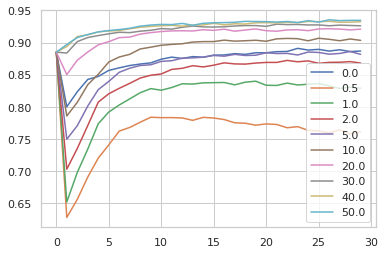

In [15]:
import seaborn as sb 
import matplotlib.pyplot as plt 

sb.set()
sb.set_style("whitegrid")

xs = {}

for key in results:
    print(key)
    print(results[key][0])
    xs[key] = [m["AUROC"] for m in results[key]]



for name, x in xs.items():
    plt.plot(x, label=name[16:-4])

plt.legend()
plt.show()


In [ ]:
"""
Do it with uniformely distributed outlier samples 
"""
from pytorch_ood.model import WideResNet
from pytorch_ood.detector import NegativeEnergy, Softmax
from pytorch_ood.utils import OODMetrics
from pytorch_ood.dataset.img import Textures
from torchvision.datasets import CIFAR10 
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import Compose, ToPILImage, Normalize, ToTensor, Resize, ToPILImage
import torch 

from pytorch_ood.loss import OutlierExposureLoss
from torch.optim import SGD
from tqdm import tqdm

torch.manual_seed(10)

mt = Compose([
    ToPILImage(),
    Resize([32,32]),
    ToTensor(),
    Normalize(
        std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
        mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
    ])

mt2 = Compose([
    Resize([32,32]),
    ToTensor(),
    Normalize(
        std=[0.24705882352941176470, 0.24352941176470588235, 0.26156862745098039215], 
        mean=[0.49137254901960784313, 0.48235294117647058823, 0.44666666666666666666]), 
    ])

# prepare data 
data_in_test = CIFAR10(root=".", download=True, transform=mt2, train=False)
data_out_test = Textures(root=".", transform=mt2, download=True)
test_loader = DataLoader(data_in_test + data_out_test, batch_size=512, num_workers=20)

x = torch.randint(0, 255, size=(80000, 3, 32, 32), dtype=torch.uint8)
gan_oe_data = torch.stack([mt(t) for t in x])
gan_oe_label = torch.ones(size=(len(x),)).long() * -1
data_out_train = TensorDataset(gan_oe_data,gan_oe_label)

data_in_train = CIFAR10(root=".", download=True, transform=mt2, target_transform=torch.tensor)
train_loader = DataLoader(data_in_train + data_out_train, batch_size=256, shuffle=True, num_workers=20)
      
# create Neural Network
model = WideResNet.from_pretrained("cifar10-pt", num_classes=10).cuda()
opti = SGD(model.parameters(), lr=0.001)

criterion = OutlierExposureLoss(alpha=0.5)


mav = 0.0
mavs = []
current_auroc = None 
ms_uniform = []

bar = tqdm(range(30))
for i in bar:
    # evaluate 
    with torch.no_grad():
        model = model.eval()
        detector = Softmax(model)
        metrics = OODMetrics()

        for x, y in test_loader:
            metrics.update(detector(x.cuda()), y)

        m = metrics.compute()
        ms_uniform.append(m)
        current_auroc = m["AUROC"]
        bar.set_postfix({"loss": mav, "AUROC": current_auroc})
        # print(m)

    # train 
    model.train()

    for x, y in train_loader:
        opti.zero_grad()
        y_hat = model(x.cuda())
        loss = criterion(y_hat, y.cuda())
        mav = 0.2 * loss.item() + 0.8 * mav
        mavs.append(mav)

        loss.backward()
        opti.step()
        bar.set_postfix({"loss": mav, "AUROC": current_auroc})

print(m["AUROC"])


In [ ]:
sb.set()
sb.set_style("whitegrid")

xs = {}

for key in results:
    print(key)
    print(results[key][0])
    xs[key] = [m["AUROC"] for m in results[key]]

for name, x in xs.items():
    plt.plot(x, label=name[16:-4])

plt.legend()
plt.show()

In [ ]:
for path in files:
    print(path)
    x = np.load(path)["x"][:36]
    fig, axs = plt.subplots(6,6,figsize=(7,7))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        ax.imshow(np.moveaxis(x[i], 0, -1))
    
    # plt.title(path)
    plt.tight_layout()
    plt.show()
    